This chart measures engagment trends over time from 2021 to 2024, and shows a clear upward trend of views thanks to the introduction of Instagram Reels and the subsquent posting of reels to the Recreation and Wellness account. For refrence, the Recreation and Wellness center saw an increased amount of Reels uploads staring in the back-half of 2023, which is exactly when we see a large uptake in view count. Disappointingly, it doens't seem that engagment has risen to meet this increase in views, at least at this current rate. 

In [ ]:
Discoverability

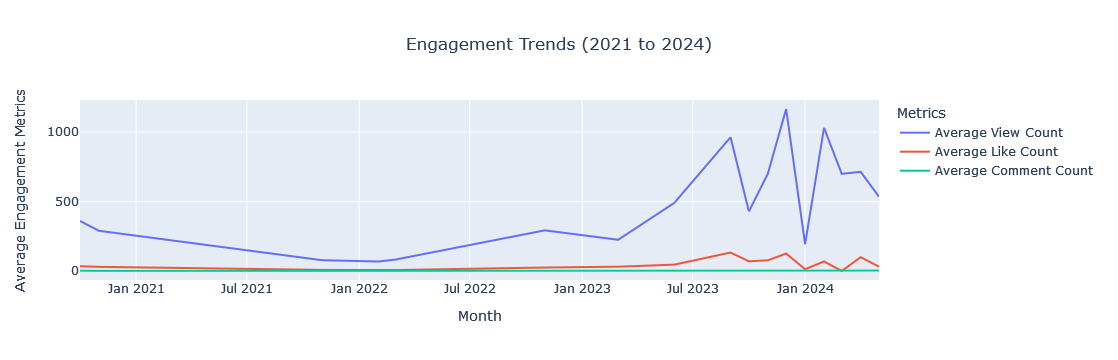

In [127]:
import pandas as pd
import plotly.express as px

# Define the dataset file path
file_path = 'Downloads/dataset_instagram-scraper_2025-03-25_16-31-50-146.csv'

# Load the Instagram data into a DataFrame
instagram_data = pd.read_csv(file_path)

# Check for required columns
required_columns = {'timestamp', 'videoViewCount', 'likesCount', 'commentsCount'}
if required_columns.issubset(instagram_data.columns):
    # Convert 'timestamp' to datetime format and remove timezone info
    instagram_data['timestamp'] = pd.to_datetime(instagram_data['timestamp'], errors='coerce').dt.tz_localize(None)

    # Ensure all relevant columns are strictly numeric and clean the data
    for column in ['videoViewCount', 'likesCount', 'commentsCount']:
        instagram_data[column] = pd.to_numeric(instagram_data[column], errors='coerce')
    instagram_data = instagram_data.dropna(subset=['timestamp', 'videoViewCount', 'likesCount', 'commentsCount'])

    # Extract month and year, and convert to string
    instagram_data['month'] = instagram_data['timestamp'].dt.to_period('M').astype(str)

    # Filter data to only include posts between 2019 and August 1, 2024
    filtered_data = instagram_data[(instagram_data['timestamp'] >= '2019-01-01') & (instagram_data['timestamp'] < '2024-08-01')]

    # Check if filtered data is empty
    if filtered_data.empty:
        print("No data exists within the specified date range (2019 to 2024).")
    else:
        # Group by month and calculate averages for the relevant columns
        monthly_trends = filtered_data.groupby('month')[['videoViewCount', 'likesCount', 'commentsCount']].mean().reset_index()

        # Rename columns for clarity
        monthly_trends.columns = ['Month', 'Average View Count', 'Average Like Count', 'Average Comment Count']

        # Create line charts for trends using Plotly
        fig = px.line(
            monthly_trends,
            x='Month',
            y=['Average View Count', 'Average Like Count', 'Average Comment Count'],
            labels={"value": "Average Engagement", "Month": "Month"},
            title="Engagement Trends (2021 to 2024)"
        )

        # Customize the layout for clarity
        fig.update_layout(
            xaxis_title="Month",
            yaxis_title="Average Engagement Metrics",
            title_x=0.5,  # Center the title
            legend_title="Metrics"
        )

        # Show the plot
        fig.show()
else:
    print("The dataset does not contain the required columns ('timestamp', 'videoViewCount', 'likesCount', 'commentsCount'). Please check the column names.")

As per this breakdown on the Instagram Discoverabilty by Medium, "Aim to post content consistently. Whether that's daily, every other day, or three times a week, consistency helps your content become more discoverable as Instagram rewards frequent and regular posting with higher engagement and better algorithm placement." https://medium.com/@trulydigitalmedia/how-to-optimize-your-instagram-profile-for-discoverability-13d0b200f0eb

Consistency in regards to the frequency of posts is extremley important to the algorith and your discoverability options, and the posts on the Kent State Recreation and Wellness Instagram page still lack somewhat. Despite a clear uptake in frequency, the amount of posts still vary wildly on a month-to-month basis. This harms discoverabillity and places you in an unfavorable position with the reccomendation algorightm. 

C:\Users\johnc\AppData\Local\Temp\ipykernel_26260\1200997897.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



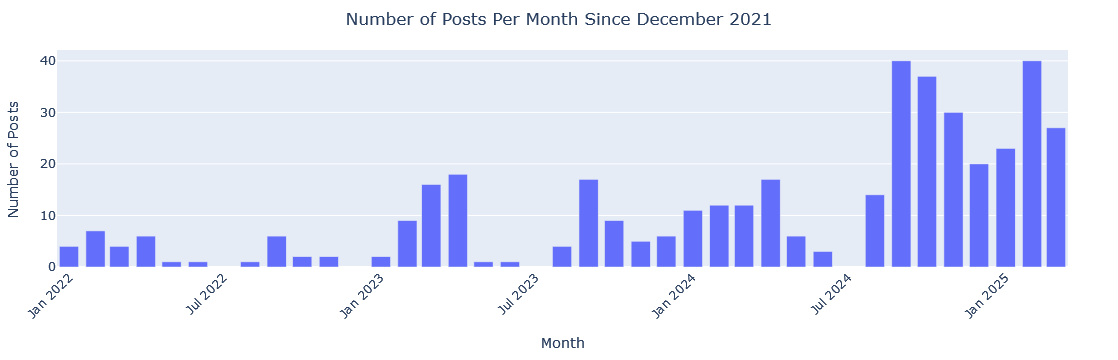

In [187]:
import pandas as pd
import plotly.express as px

# Define the dataset file path
file_path = 'Downloads/dataset_instagram-scraper_2025-03-25_16-31-50-146.csv'

# Load the Instagram data into a DataFrame
instagram_data = pd.read_csv(file_path)

# Check for required columns
if 'timestamp' in instagram_data.columns:
    # Convert 'timestamp' to datetime format
    instagram_data['timestamp'] = pd.to_datetime(instagram_data['timestamp'], errors='coerce').dt.tz_localize(None)

    # Filter for posts made since December 2021
    filtered_data = instagram_data.loc[instagram_data['timestamp'] >= '2021-12-01']  # Use .loc explicitly

    # Group posts by month and count
    filtered_data['month'] = filtered_data['timestamp'].dt.to_period('M')  # Extract the year-month period
    posts_per_month = filtered_data.groupby('month')['timestamp'].count().reset_index()
    posts_per_month.columns = ['Month', 'Number of Posts']

    # Convert 'Month' back to datetime for plotting
    posts_per_month['Month'] = posts_per_month['Month'].dt.to_timestamp()

    # Create a bar chart
    fig = px.bar(
        posts_per_month,
        x='Month',
        y='Number of Posts',
        labels={"Month": "Month", "Number of Posts": "Number of Posts"},
        title="Number of Posts Per Month Since December 2021"
    )

    # Customize the layout for better visibility
    fig.update_layout(
        xaxis_title="Month",
        yaxis_title="Number of Posts",
        title_x=0.5,  # Center the title
        margin=dict(l=50, r=50, t=50, b=50),  # Add padding
        xaxis=dict(tickangle=-45)  # Rotate x-axis labels for readability
    )

    # Show the plot
    fig.show()
else:
    print("The dataset does not contain a 'timestamp' column.")

This chart shows the relationship between video length, in seconds, with the views a video recives. While there is certainly an upward trend, futher data would need to be collected in order to prove that this data is applicable and reliable. From the looks of this chart, a reel between 20 and 40 seconds seemlingly leads a higher discoverability rate. 

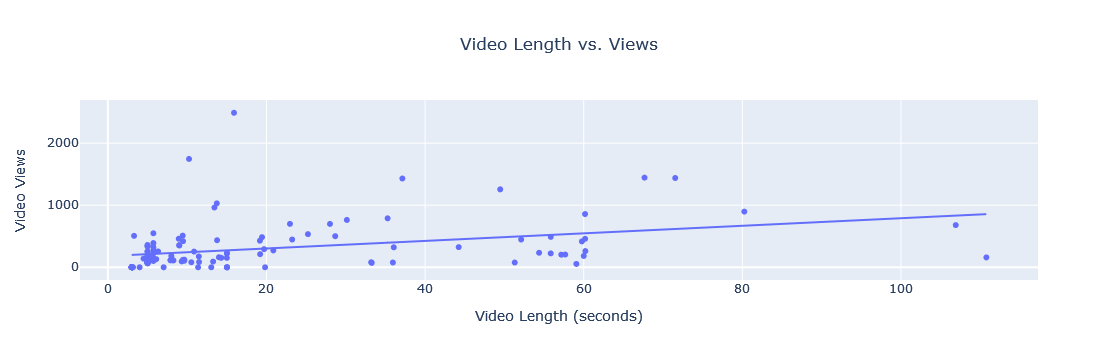

In [123]:
import pandas as pd
import plotly.express as px

# Define the dataset file path
file_path = 'Downloads/dataset_instagram-scraper_2025-03-25_16-31-50-146.csv'

# Load the Instagram data into a DataFrame
instagram_data = pd.read_csv(file_path)

# Check for required columns
required_columns = {'videoDuration', 'videoViewCount'}
if required_columns.issubset(instagram_data.columns):
    # Ensure relevant columns are strictly numeric
    instagram_data['videoDuration'] = pd.to_numeric(instagram_data['videoDuration'], errors='coerce')
    instagram_data['videoViewCount'] = pd.to_numeric(instagram_data['videoViewCount'], errors='coerce')

    # Drop rows with missing or invalid data
    filtered_data = instagram_data.dropna(subset=['videoDuration', 'videoViewCount'])

    # Create scatter plot with Plotly
    fig = px.scatter(
        filtered_data,
        x='videoDuration',
        y='videoViewCount',
        labels={"videoDuration": "Video Length (seconds)", "videoViewCount": "Video Views"},
        title="Video Length vs. Views",
        trendline="ols"  # Add a trendline to show the correlation
    )

    # Customize the layout for clarity
    fig.update_layout(
        xaxis_title="Video Length (seconds)",
        yaxis_title="Video Views",
        title_x=0.5  # Center the title
    )

    # Show the plot
    fig.show()
else:
    print("The dataset does not contain the required columns ('videoDuration', 'videoViewCount'). Please check the column names.")

In [121]:
import pandas as pd

# Load the dataset
file_path = 'Downloads/dataset_instagram-scraper_2025-03-25_16-31-50-146.csv'
data = pd.read_csv(file_path)

# Option 1: Print each column name individually
print("List of columns in the dataset:")
for column in data.columns:
    print(column)

# Option 2: Display all column names as a complete list
print("\nColumns as a Python list:")
columns_list = data.columns.tolist()
print(columns_list)

# Option 3: Save column names to a file for easy reference
with open('columns_list.txt', 'w') as file:
    file.write("\n".join(columns_list))
print("\nColumn names have been saved to 'columns_list.txt'.")

List of columns in the dataset:
alt
caption
childPosts/0/alt
childPosts/0/caption
childPosts/0/commentsCount
childPosts/0/dimensionsHeight
childPosts/0/dimensionsWidth
childPosts/0/displayUrl
childPosts/0/firstComment
childPosts/0/id
childPosts/0/likesCount
childPosts/0/ownerId
childPosts/0/shortCode
childPosts/0/taggedUsers/0/full_name
childPosts/0/taggedUsers/0/id
childPosts/0/taggedUsers/0/is_verified
childPosts/0/taggedUsers/0/profile_pic_url
childPosts/0/taggedUsers/0/username
childPosts/0/taggedUsers/1/full_name
childPosts/0/taggedUsers/1/id
childPosts/0/taggedUsers/1/is_verified
childPosts/0/taggedUsers/1/profile_pic_url
childPosts/0/taggedUsers/1/username
childPosts/0/timestamp
childPosts/0/type
childPosts/0/url
childPosts/0/videoPlayCount
childPosts/0/videoUrl
childPosts/0/videoViewCount
childPosts/1/alt
childPosts/1/caption
childPosts/1/commentsCount
childPosts/1/dimensionsHeight
childPosts/1/dimensionsWidth
childPosts/1/displayUrl
childPosts/1/firstComment
childPosts/1/id
ch

In [ ]:
Engagment

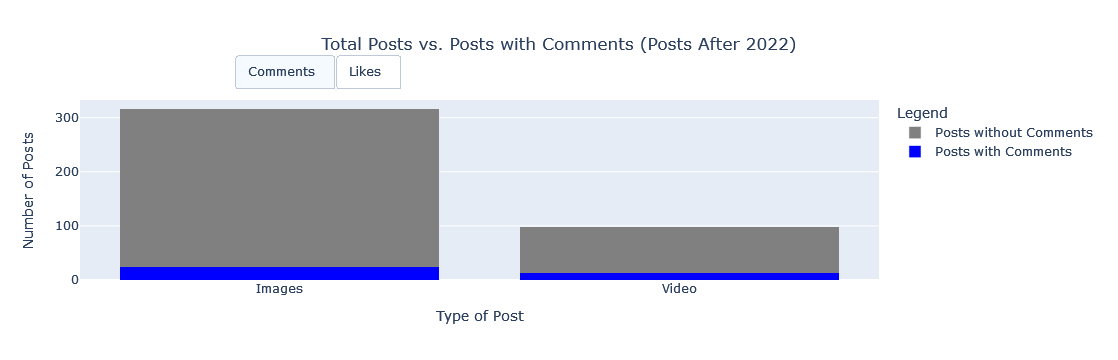

In [193]:
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(label="Comments",
                     method="update",
                     args=[{"visible": [True, True, False, False]},  # Show comments, hide likes
                           {"title": "Total Posts vs. Posts with Comments (Posts After 2022)"}]),
                dict(label="Likes",
                     method="update",
                     args=[{"visible": [False, False, True, True]},  # Show likes, hide comments
                           {"title": f"Posts Above and Below Average Likes with Percentages (Posts After 2022)\n(Average Likes Per Post: {average_likes:.2f})"}]),
            ],
            showactive=True,
            x=0.4,  # Move button group slightly to the left
            y=1.25  # Move button group slightly up
        )
    ]
)

C:\Users\johnc\AppData\Local\Temp\ipykernel_26260\2571406612.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\johnc\AppData\Local\Temp\ipykernel_26260\2571406612.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



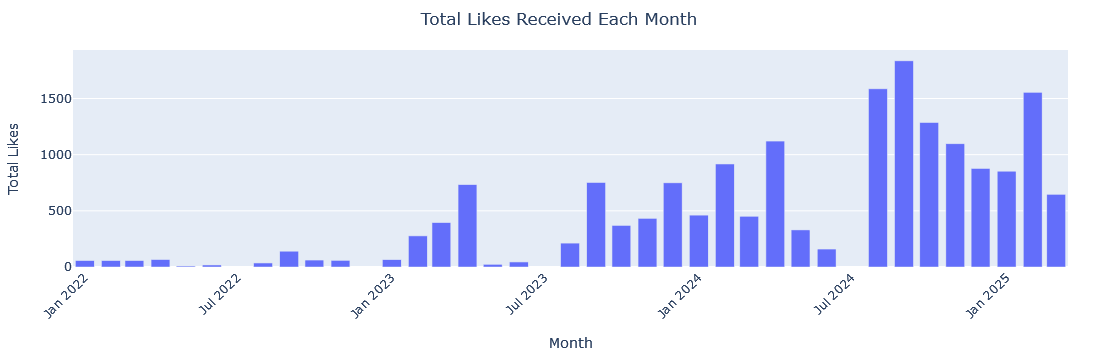

In [201]:
import pandas as pd
import plotly.express as px

# Define the dataset file path
file_path = 'Downloads/dataset_instagram-scraper_2025-03-25_16-31-50-146.csv'

# Load the Instagram data into a DataFrame
instagram_data = pd.read_csv(file_path)

# Check for required columns
required_columns = {'likesCount', 'timestamp'}
if required_columns.issubset(instagram_data.columns):
    # Convert 'timestamp' to datetime format
    instagram_data['timestamp'] = pd.to_datetime(instagram_data['timestamp'], errors='coerce').dt.tz_localize(None)

    # Filter for posts made after December 2021
    filtered_data = instagram_data[instagram_data['timestamp'] >= '2021-12-01']

    # Ensure 'likesCount' is numeric
    filtered_data['likesCount'] = pd.to_numeric(filtered_data['likesCount'], errors='coerce')

    # Group by month and sum up the likes
    filtered_data['month'] = filtered_data['timestamp'].dt.to_period('M')  # Extract year-month
    likes_by_month = filtered_data.groupby('month')['likesCount'].sum().reset_index()
    likes_by_month.columns = ['Month', 'Total Likes']

    # Convert 'Month' back to datetime for plotting
    likes_by_month['Month'] = likes_by_month['Month'].dt.to_timestamp()

    # Create a bar chart for total likes
    fig = px.bar(
        likes_by_month,
        x='Month',
        y='Total Likes',
        labels={"Month": "Month", "Total Likes": "Total Likes"},
        title="Total Likes Received Each Month"
    )

    # Customize the layout for better visibility
    fig.update_layout(
        xaxis_title="Month",
        yaxis_title="Total Likes",
        title_x=0.5,  # Center the title
        margin=dict(l=50, r=50, t=50, b=50),  # Add padding
        xaxis=dict(tickangle=-45)  # Rotate x-axis labels for readability
    )

    # Show the plot
    fig.show()
else:
    print("The dataset does not contain the required columns ('likesCount' or 'timestamp'). Please check the column names.")